In [31]:

        #   resType: Codes.ChatHisResType.TEXT,

In [32]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [33]:
from typing import List


class AgentState(TypedDict): # Our state schema
    message: str
    name: str


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a Greeting Message to the state"""
    state["message"] = "Hey, " + state["name"] + "! How are you?"
    return state

def farewell_node(state: AgentState) -> AgentState:
    state["message"] = "Goodbye, " + state["name"] + "!"
    return state

In [34]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.add_node("farewell", farewell_node)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "farewell")  # greeter에서 farewell로 가는 엣지 추가
graph.set_finish_point("farewell")

app = graph.compile()

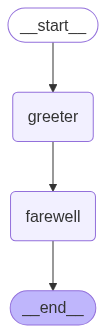

In [35]:

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
result = app.invoke({"name": "Bob"})
print(result)

{'message': 'Goodbye, Bob!', 'name': 'Bob'}
